<a href="https://colab.research.google.com/github/Aryan4884/Medical-Image-Classification/blob/main/arya230.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
''' Do not change this cell '''
#Functions

def check_gpu():
  if tf.test.gpu_device_name() != '':
    print("GPU sucessfully connected")
  else: print("PLease connect GPU")

def check_data():
  a = set()
  for image in Images:
    a.add(Image.shape[2])
  if len(a)==1 and len(Images)==624:
    print("PASS")
  else: print("FAIL")

In [3]:
#Import any library here only.
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import keras
from PIL import Image
import tensorflow as tf
import matplotlib.image as mpimg
import random


In [4]:
#Setup and check a gpu connection.
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/OpenCodeData.zip'

Mounted at /content/drive
Archive:  /content/OpenCodeData.zip
   creating: OpenCodeData/OpenCodeData/
   creating: OpenCodeData/OpenCodeData/INFECTED/
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_11.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_12.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_13.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_6.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_7.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_8.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_9.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person10_virus_35.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_475.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_477.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person100_bacteria_478.jpeg  
  inflating: OpenCodeData/OpenCodeData/INF

In [5]:
''' Do not change this cell '''
check_gpu()

GPU sucessfully connected


In [6]:
# Create two lists, images and labels. Store Input images in 'Images' list and its labels in 'Labels' list.
# Infected Images have two categories viral and bacterial. Find Number of images in each class. (Hint: See image name)
# Note that images are of different sizes.
# Load the dataset
images=[]
labels=[]
normal_images=[]
infected_images=[]
#Resizing the Image.
Image_size=[224,224]

Infected_path='/content/OpenCodeData/OpenCodeData/INFECTED'
Normal_path='/content/OpenCodeData/OpenCodeData/NORMAL'

Main_path='/content/OpenCodeData/OpenCodeData'

for root, dirs, files in os.walk(Main_path):
    for filename in files:
          if filename.endswith('.jpeg'):
                img_path=os.path.join(root,filename)
                img=cv2.imread(img_path)
                res_img=cv2.resize(img,Image_size)
                images.append(res_img)

                if 'bacteria' in filename:
                      labels.append('Bacteria')
                      infected_images.append(res_img)
                elif 'virus' in filename:
                      labels.append('Viral')
                      infected_images.append(res_img)
                else:
                    labels.append('Normal')
                    normal_images.append(res_img)

num_of_normal=labels.count('Normal')
num_of_virus=labels.count('Viral')
num_of_bacteria=labels.count('Bacteria')

print(f"\nNumber of Normal images in the file: {num_of_normal}")
print(f"\nNumber of Viral images in the file: {num_of_virus}")
print(f"\nNumber of Bacterial images in the file: {num_of_bacteria}")




Number of Normal images in the file: 234

Number of Viral images in the file: 148

Number of Bacterial images in the file: 242


In [ ]:
''' Do not change this cell '''
check_data()

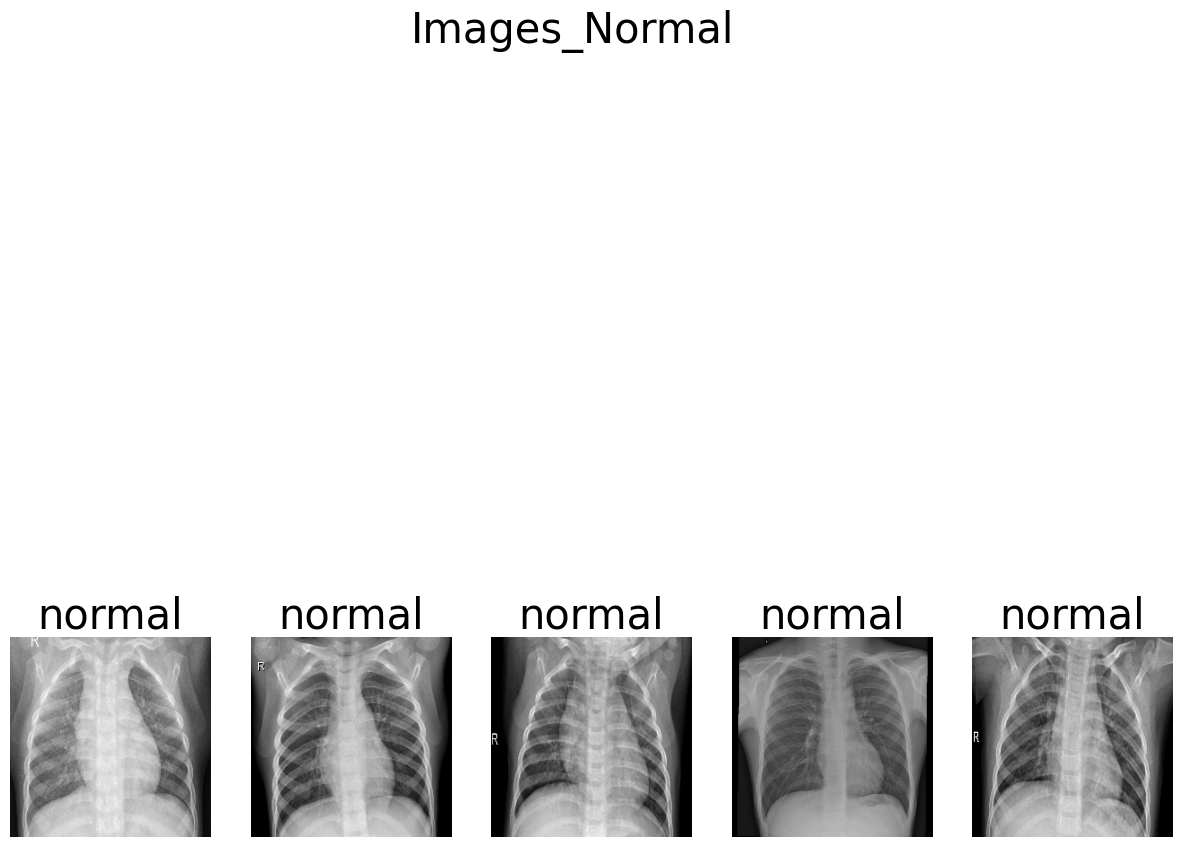

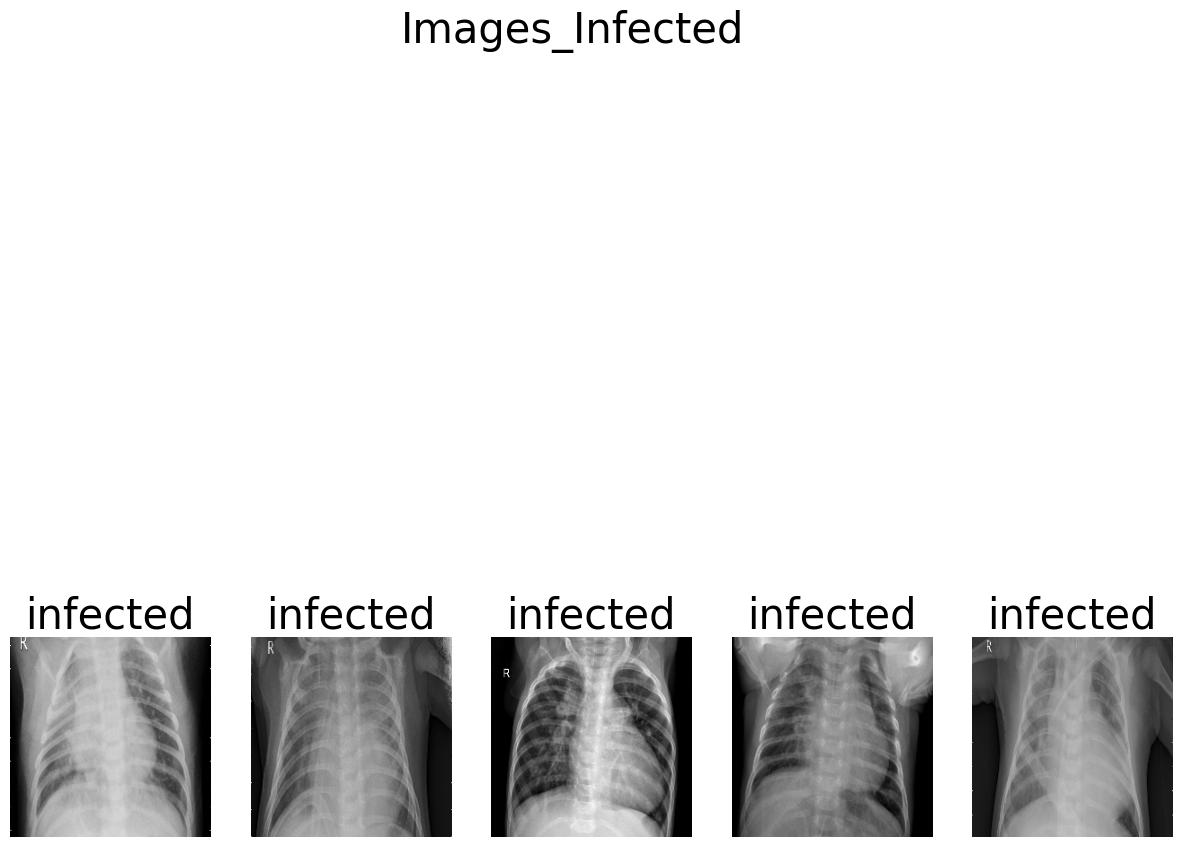

In [8]:
#Plot 5 images each of normal and infected category.
#Also do neccessary labelings. Make sure your plots have all necessary details and looks good :)
#You can customise your plots as per your wish.

figure_1,series1=plt.subplots(ncols=5,figsize=(15,15))
plt.suptitle('Images_Normal', fontsize=30)
for  i, img in enumerate(normal_images[-5:]):
    series1[i].imshow(img.astype(int))
    series1[i].title.set_text("normal")
    series1[i].title.set_size(30)
    series1[i].axis('off')

figure_2,series2=plt.subplots(ncols=5,figsize=(15,15))
plt.suptitle('Images_Infected', fontsize=30)
for i, img in enumerate(infected_images[-5:]):
    series2[i].imshow(img.astype(int))
    series2[i].title.set_text("infected")
    series2[i].title.set_size(30)
    series2[i].axis('off')